<a href="https://colab.research.google.com/github/AdejokeOgundipe/Machine-Learning/blob/master/MachineLearningModelHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


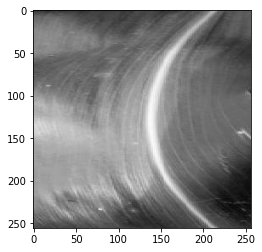

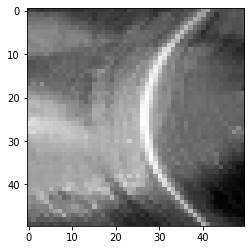

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint

import pickle
import time
DATADIR="/content/drive/My Drive/Colab Notebooks/Datasets/Corn_dataset"
CATEGORIES = ["Healthy", "Unhealthy"]
#DATADIR="/content/drive/My Drive/Colab Notebooks/Datasets/Cats and dogs/cat-and-dog/training_set/training_set"

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap ='gray')
    plt.show()
    break 
  break
#print(img_array.shape)
IMG_SIZE = 50 
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap ='gray')
plt.show()

training_set =[]
def creating_training_dataset():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
        training_set.append([new_array, class_num])
      except Exception as e:
        pass 
creating_training_dataset()


In [ ]:
#%load_ext tensorboard
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./log', histogram_freq=1, write_graph=True, write_images=True)

#NAME = "cats-and-dogs-{}".format(int(time.time()))
#tensorboard= TensorBoard(log_dir='logs/{}'.format(NAME))
#print(NAME)
#print(tensorboard)
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip
#NAME = "cats-and-dogs-{}".format(int(time.time()))
#tensorboard= TensorBoard(log_dir='logs/{}'.format(NAME))
#print(NAME)
#print(tensorboard)
#LOG_DIR = './log'
#get_ipython().system_raw(
 #   'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
  #  .format(LOG_DIR)
#)
#get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
#print(len(training_set))

In [ ]:
import random
random.shuffle(training_set)
for sample in training_set[:10]:
  print(sample[1])
x =[]
y=[]
for features,label in training_set:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(len(training_set), IMG_SIZE, IMG_SIZE,1)
y = np.array(y)

import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out =open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)



x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))


X = x/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_sizes,dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            print(NAME)
            model = Sequential()
            model.add(Conv2D(layer_size,(3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

                
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy', 
                          optimizer='adam',
                          metrics=['accuracy'],)
                
                #checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose = 1, callbacks_list =[checkpoint])
            modelresult = model.fit(x,y, batch_size=32, verbose=1, 
                      epochs=10, validation_split=0.1, 
                      callbacks=[tensorboard])
            print(modelresult)
          


model.save('64x3-CNN.model')

      #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./log', histogram_freq=1, write_graph=True, write_images=True)


0
0
1
0
1
1
0
0
1
1
3-conv-[64]-nodes-0-dense-1602280585
Epoch 1/10
34/34 [==============================] - 5s 160ms/step - loss: 0.9304 - accuracy: 0.8738 - val_loss: 0.0624 - val_accuracy: 0.9664
Epoch 2/10
34/34 [==============================] - 5s 155ms/step - loss: 0.0700 - accuracy: 0.9822 - val_loss: 0.0919 - val_accuracy: 0.9748
Epoch 3/10
34/34 [==============================] - 5s 156ms/step - loss: 0.0471 - accuracy: 0.9832 - val_loss: 0.0685 - val_accuracy: 0.9748
Epoch 4/10
34/34 [==============================] - 5s 156ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0940 - val_accuracy: 0.9748
Epoch 5/10
34/34 [==============================] - 5s 156ms/step - loss: 0.0397 - accuracy: 0.9897 - val_loss: 0.0442 - val_accuracy: 0.9916
Epoch 6/10
34/34 [==============================] - 5s 157ms/step - loss: 0.0137 - accuracy: 0.9972 - val_loss: 0.0319 - val_accuracy: 0.9832
Epoch 7/10
34/34 [==============================] - 5s 156ms/step - loss: 0.0107 - accuracy

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


In [ ]:
saved_model_dir = '/content/64x3-CNN.model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
tflite_model_file ="converted_model.tflite"

with open('tflite_model_file', 'wb') as f:
  f.write(tflite_model)

#labels = '\n'.join(sorted(train_generator.class_indices.keys()))
labels =['Healthy', 'Unhealthy']
with open('labels.txt', 'w') as f:
  f.write('\n'.join(labels))

INFO:tensorflow:Assets written to: /content/64x3-CNN.model/assets


INFO:tensorflow:Assets written to: /content/64x3-CNN.model/assets


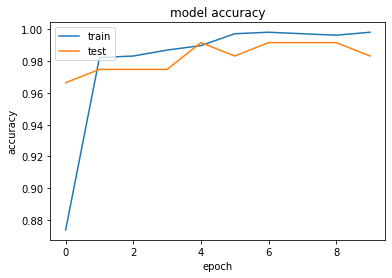

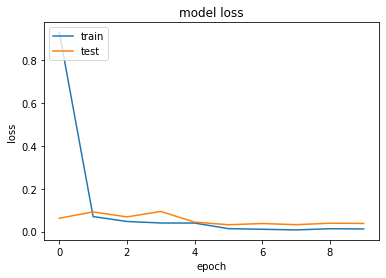

In [ ]:
plt.plot(modelresult.history['accuracy'])
plt.plot(modelresult.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(modelresult.history['loss'])
plt.plot(modelresult.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# serialize model structure to JSON
#model_json = model.to_json()
#with open("model_json", w) as json_file:
  #json_file.write(model_json)

try:
  from google.colab import files
  files.download('tflite_model_file')
  files.download('labels.text')

except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Test the tflite model using the python interpreter
 
#interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
#interpreter.allocate_tensors()
 
#input_index = interpreter.get_input_details()[0]["index"]
#input_Index = interpreter.get_output_details()[0]["index"]
 
 
#predicts = []
#test_labels, test_imgs = [], []
#for img, label in test_set[:10]:
  #interpreter.set_tensor(input_index, img)
  #interpreter.invoke()
  #predictions.append(interpreter.get_tensor(output_index))
 
  #test_labels.append(Labels.nupy()[0])
  #test_img.apprend(img)
 
 
#prediction = model.predict(/content/drive/My Drive/Colab Notebooks/Datasets/Cats and dogs/cat-and-dog/test_set/test_set)

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES =["Healthy","Unhealthy"]

def prepare(filepath):
  IMG_SIZE = 50
  img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1 )

model = tf.keras.models.load_model("64x3-CNN.model")
print(model)

prediction = model.predict([prepare('/content/cornleave.jpg')])
print(prediction)
prediction = model.predict([prepare('/content/test.jpg')])
print(prediction)


[[0.9410274]]
[[8.812084e-05]]


can u see this 
can u hear me ooo
I cant realy hear you
i was like i will be working with a larger dataset to test the model
yeso

okay but i thnk you need to start working with a dataset similar to what you are workingon
yap 
the corn stuff is 
it is divided into 2 same as the one i'm working on
where can i get more dataset pls ooo
noooooooooooooooooooooooooooooo
i can hear you
no probs 
thanks 
boss
dataset is dataset
u say wat
would u like to work with guinea fowl
y.esthey make alot of noise you know
yeso
ok i have been working on somethink ralting to them so i think i will check around for something relating to them
airit boss
so what dataset in particular do you need?
chicken feces

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES =["Healthy","Unhealthy"]

def prepare(filepath):
  IMG_SIZE = 50
  img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)

  new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,1 )

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('/content/cornleave.jpg')])

print(prediction)
print(CATEGORIES[int(prediction[0][0])])

[[0.9410274]]
Healthy


In [ ]:
#prediction = model.predict([prepare('/content/cornleave.jpg')])
prediction = model.predict([prepare('/content/test2.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Unhealthy


In [ ]:
prediction = model.predict([prepare('/content/test.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Healthy
